# Pymaceuticals Inc.
---

### Analysis
##### Summary findings as follows:
1. Per box plot provided below, Capomulin's results appear to be one of the most effective treatments in reducing tumor size when compared to three peers--although Ramicane may have slightly better results. Average tumor volume for both Capomulin and Ramicane subjects remained lowest amongst all treatments too, both with the lowest SEM as well.

2. Sample data for one mouse shows Capomulin may reduce tumor volume as much as 10% over a 45-day period.

3. Per scatter plot data provided below, there appears to be a direct correlation between a mouse's weight and tumor volume: a measured correlation coefficient of 0.84.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_comb = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_comb.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(mouse_study_comb['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Group table by possible duplicate Timepoint data
duplicate_study = mouse_study_comb.groupby(['Mouse ID', 'Timepoint'])

# Count the rows for each Mouse ID
rowcounts = duplicate_study['Timepoint'].count()

# Display Mouse ID for any with more than one Timepoint record by day count
rowcounts.loc[rowcounts > 1]

Mouse ID  Timepoint
g989      0            2
          5            2
          10           2
          15           2
          20           2
Name: Timepoint, dtype: int64

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_comb.loc[mouse_study_comb['Mouse ID'] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID (aka remove all records for that mouse)
clean_study = mouse_study_comb.loc[mouse_study_comb['Mouse ID'] != 'g989']
clean_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Method 1:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

# Group dataset by drug
clean_study_group = clean_study.groupby(['Drug Regimen'])

# Calculate summary statistics
mean1 = clean_study_group['Tumor Volume (mm3)'].mean()
median1 = clean_study_group['Tumor Volume (mm3)'].median()
variance1 = clean_study_group['Tumor Volume (mm3)'].var()
stddev1 = clean_study_group['Tumor Volume (mm3)'].std()
stderr1 =clean_study_group['Tumor Volume (mm3)'].sem()

# Assemble dataframe
summary1 = pd.DataFrame({"Mean Tumor Volume" : mean1,
                         "Median Tumor Volume" : median1,
                         "Tumor Volume Variance" : variance1,
                         "Tumor Volume Std. Dev." : stddev1,
                         "Tumor Volume Std. Err." : stderr1})
#Display dataframe
summary1

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Method 2:  Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# by using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics using aggregation method
summary2 = clean_study_group['Tumor Volume (mm3)'].aggregate(['mean', 'median', 'var', 'std', 'sem'])

# Display dataframe and set caption to match provided example
summary2

styles = [dict(selector="caption", 
               props=[("text-align", "right"),
                      ("font-weight", "bold"),
                      ("color", "black")])]

summary2.style.set_caption('Tumor Volume (mm3)').set_table_styles(styles)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

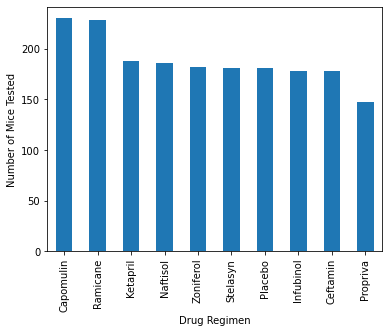

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

# Create new dataframe for plotting
count_timepoints1 = pd.DataFrame(clean_study)

# Count the number of Timepoints (records) per Drug Regimen
count_timepoints1 = count_timepoints1['Drug Regimen'].value_counts()

# Plot and display the dataframe
count_timepoints1.plot(kind='bar', figsize=(6,4.5), xlabel="Drug Regimen", ylabel="Number of Mice Tested")
plt.show()

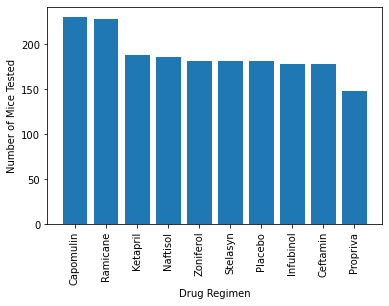

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create new dataframe for plotting
count_timepoints2 = pd.DataFrame(clean_study)

# Count the number of Timepoints (records) per Drug Regimen
count_timepoints2 = count_timepoints2['Drug Regimen'].value_counts()

# Create ticks for the x-axis using length of the summary count
x_axis = np.arange(0, len(count_timepoints2.index))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Create labels for the axes    
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

# Plot and display the data using pyplot
plt.bar(x_axis, count_timepoints2, color="C0", align="center")
plt.xticks(tick_locations, count_timepoints2.index, rotation="vertical")
plt.show()

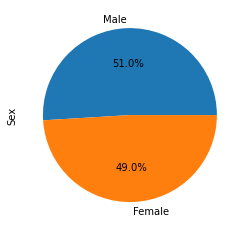

In [11]:
# Method1:  Generate a pie plot showing the distribution of female versus male mice using Pandas
# To clarify:  This answers the question:  of all the measurements taken, what percent where on male and female mice.
# This is different than:  of all the mice, what percent were male and female?

# Obtain count of measurements by Sex
count_msre_by_sex1 = clean_study['Sex'].value_counts()

# Plot and display the dataframe
count_msre_by_sex1.plot(kind='pie', ylabel="Sex", autopct='%1.1f%%')
plt.show()

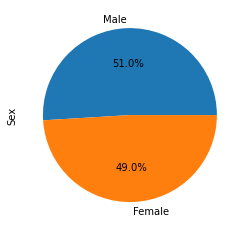

In [12]:
# Method 2:  Generate a pie plot showing the distribution of female versus male mice using matplotlib (aka pyplot, plt)
# Same clarification as above.

# Obtain count of measurements by Sex
count_msre_by_sex2 = clean_study['Sex'].value_counts()

# Plot the dataframe and y-axis label
plt.pie(count_msre_by_sex2, labels=count_msre_by_sex2.index, autopct="%1.1f%%")
plt.ylabel("Sex")

# Print our chart to the screen
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

max_timepoints = clean_study[['Mouse ID', 'Timepoint']]
max_timepoints = max_timepoints.groupby(['Mouse ID'])
max_timepoints = max_timepoints.max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

max_timepoints_by_mouse = pd.merge(max_timepoints, clean_study, on=['Mouse ID', 'Timepoint'], how="inner")

In [14]:
# Put treatments into a list for later plot labels
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create separate Tumor Volume (mm3) dataframes for each of the four treatments under study
Capomulin_df = max_timepoints_by_mouse[max_timepoints_by_mouse['Drug Regimen'].isin(['Capomulin'])]
Capomulin_df = Capomulin_df['Tumor Volume (mm3)']
            
Ramicane_df = max_timepoints_by_mouse[max_timepoints_by_mouse['Drug Regimen'].isin(['Ramicane'])]
Ramicane_df = Ramicane_df['Tumor Volume (mm3)']
    
Infubinol_df = max_timepoints_by_mouse[max_timepoints_by_mouse['Drug Regimen'].isin(['Infubinol'])]
Infubinol_df = Infubinol_df['Tumor Volume (mm3)']
   
Ceftamin_df = max_timepoints_by_mouse[max_timepoints_by_mouse['Drug Regimen'].isin(['Ceftamin'])]
Ceftamin_df = Ceftamin_df['Tumor Volume (mm3)']

# Create a combined list of the four treatments' dataframes for later plotting
list_of_treatment_data = [Capomulin_df, Ramicane_df, Infubinol_df, Ceftamin_df]


# Calculate the IQR and quantitatively determine if there are any potential outliers for each of the four treatments 
# Print results for each drugs' outliers

# Calculate and display potential outliers for Capomulin
Capomulin_quartiles = Capomulin_df.quantile([.25,.5,.75])
Capomulin_lowerq = Capomulin_quartiles[0.25]
Capomulin_upperq = Capomulin_quartiles[0.75]
Capomulin_iqr = Capomulin_upperq-Capomulin_lowerq

Capomulin_lower_bound = Capomulin_lowerq - (1.5*Capomulin_iqr)
Capomulin_upper_bound = Capomulin_upperq + (1.5*Capomulin_iqr)
Capomulin_outliers = []

for x in Capomulin_df:
    if ((x < Capomulin_lower_bound) | (x > Capomulin_upper_bound)):
        Capomulin_outliers.append(x)
        
if len(Capomulin_outliers) == 0:
    print("Capomulin's potential outliers: None calculated")
else:
    print("Capomulin's potential outliers: " + str(Capomulin_outliers)[1:-1])
      
# Calculate and display potential outliers for Ramicane
Ramicane_quartiles = Ramicane_df.quantile([.25,.5,.75])
Ramicane_lowerq = Ramicane_quartiles[0.25]
Ramicane_upperq = Ramicane_quartiles[0.75]
Ramicane_iqr = Ramicane_upperq-Ramicane_lowerq

Ramicane_lower_bound = Ramicane_lowerq - (1.5*Ramicane_iqr)
Ramicane_upper_bound = Ramicane_upperq + (1.5*Ramicane_iqr)
Ramicane_outliers = []

for x in Ramicane_df:
    if ((x < Ramicane_lower_bound) | (x > Ramicane_upper_bound)):
        Ramicane_outliers.append(x)
        
if len(Ramicane_outliers) == 0:
    print("Ramicane's potential outliers: None calculated")
else:
    print("Ramicane's potential outliers: " + str(Ramicane_outliers)[1:-1])
    
# Calculate and display potential outliers for Infubinol
Infubinol_quartiles = Infubinol_df.quantile([.25,.5,.75])
Infubinol_lowerq = Infubinol_quartiles[0.25]
Infubinol_upperq = Infubinol_quartiles[0.75]
Infubinol_iqr = Infubinol_upperq-Infubinol_lowerq

Infubinol_lower_bound = Infubinol_lowerq - (1.5*Infubinol_iqr)
Infubinol_upper_bound = Infubinol_upperq + (1.5*Infubinol_iqr)
Infubinol_outliers = []

for x in Infubinol_df:
    if ((x < Infubinol_lower_bound) | (x > Infubinol_upper_bound)):
        Infubinol_outliers.append(x)
        
if len(Infubinol_outliers) == 0:
    print("Infubinol's potential outliers: None calculated")
else:
    print("Infubinol's potential outliers: " + str(Infubinol_outliers)[1:-1])
    
# Calculate and display potential outliers for Ceftamin
Ceftamin_quartiles = Ceftamin_df.quantile([.25,.5,.75])
Ceftamin_lowerq = Ceftamin_quartiles[0.25]
Ceftamin_upperq = Ceftamin_quartiles[0.75]
Ceftamin_iqr = Ceftamin_upperq-Ceftamin_lowerq

Ceftamin_lower_bound = Ceftamin_lowerq - (1.5*Ceftamin_iqr)
Ceftamin_upper_bound = Ceftamin_upperq + (1.5*Ceftamin_iqr)
Ceftamin_outliers = []

for x in Ceftamin_df:
    if ((x < Ceftamin_lower_bound) | (x > Ceftamin_upper_bound)):
        Ceftamin_outliers.append(x)
        
if len(Ceftamin_outliers) == 0:
    print("Ceftamin's potential outliers: None calculated")
else:
    print("Ceftamin's potential outliers: " + str(Ceftamin_outliers)[1:-1])

Capomulin's potential outliers: None calculated
Ramicane's potential outliers: None calculated
Infubinol's potential outliers: 36.3213458
Ceftamin's potential outliers: None calculated


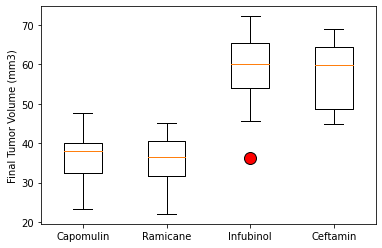

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Assign x-axis tick location numbers to list based on the length of our Treatments list
x_axis = np.arange(1, len(treatments)+1)
tick_locations = []
for x in x_axis:
    tick_locations.append(x)

# Plot box plot including formatting for outlier
fig1, ax1 = plt.subplots()
flierprops = dict(marker='o', markerfacecolor='red', markersize=12,
                  linestyle='solid')
ax1.boxplot(list_of_treatment_data, flierprops=flierprops)
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks(tick_locations, treatments)
plt.show()

## Line and Scatter Plots

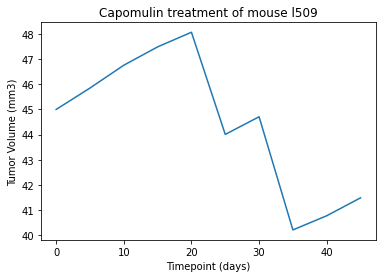

In [16]:
# Generate a line plot of tumor volume vs. time for a mouse treated with Capomulin

# Obtain dataframe for studying Volume vs. Timepoint
time_vs_volume = clean_study[['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Filter dataframe for mouse l509
filter_by_l509 = time_vs_volume[time_vs_volume['Mouse ID'].isin(['l509'])]

# Create lists for l509's Timepoints and Tumor Volume
timepoints = filter_by_l509['Timepoint']
volume = filter_by_l509['Tumor Volume (mm3)']

# Give our graph a title and label the axes
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

# Plot and display line plot
plt.plot(timepoints, volume)
plt.show()

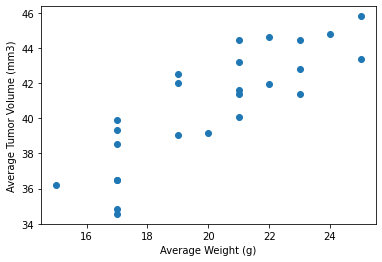

In [17]:
# Generate a scatter plot of average tumor volume vs. average mouse weight of each mouse treated with the Capomulin regimen

# Obtain dataframe for studying Volume vs. Weight
weight_vs_volume = clean_study[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)', 'Weight (g)']]

# Filter dataframe for Capomulin treatment only
weight_vs_volume = weight_vs_volume[weight_vs_volume['Drug Regimen'].isin(['Capomulin'])]

# Group dataframe by mouse, and store average Weight/Tumor Volume for each mouse in a variable for plotting
weight_vs_volume_grp = weight_vs_volume.groupby('Mouse ID')
weight_avg = weight_vs_volume_grp['Weight (g)'].mean()
volume_avg = weight_vs_volume_grp['Tumor Volume (mm3)'].mean()

# Label the axes
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plot and display scatter plot
plt.scatter(weight_avg, volume_avg);
plt.show()

## Correlation and Regression

The correlation between average mouse weight and the average tumor volume is 0.84


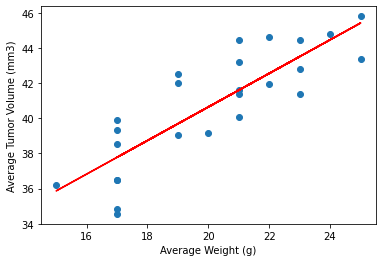

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate and display the correlation coefficient for average Weight/Tumor Volume
correlation = st.pearsonr(weight_avg,volume_avg)
print(f"The correlation between average mouse weight and the average tumor volume is {round(correlation[0],2)}")

# Calculate the linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight_avg, volume_avg)
regress_values = weight_avg * slope + intercept

# Label the axes
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# Plot and display scatter plot with the linear regression
plt.scatter(weight_avg, volume_avg);
plt.plot(weight_avg,regress_values,"r-")
plt.show()